# Creating Filters and perform edge detection

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

%matplotlib inline

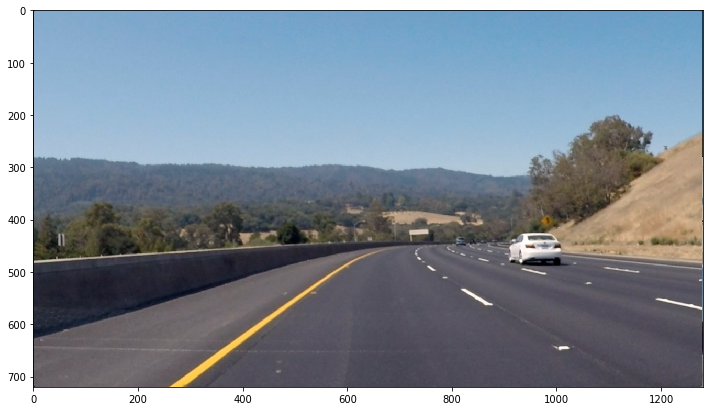

In [75]:
img = cv.imread('images/curved_lane.jpg', cv.IMREAD_COLOR)

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_rgb = img[:,:,::-1]

plt.figure(figsize=(12, 7))
plt.imshow(img_rgb, cmap='gray')
plt.show()

## Create a custom kernel
Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of taking (an approximation) of the derivative of the image in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

It's up to you to create a Sobel x operator and apply it to the given image.

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

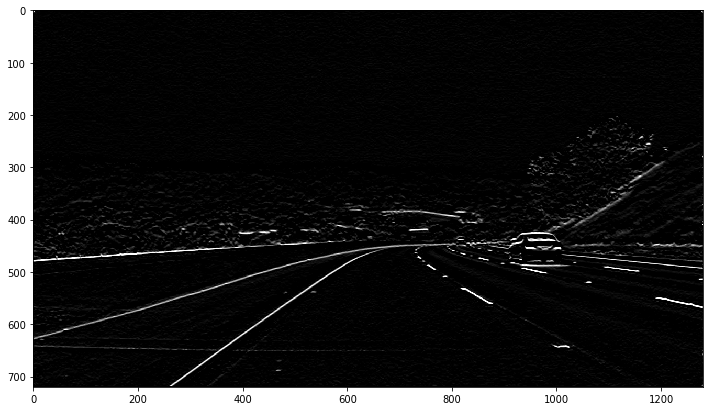

In [13]:
# 3x3 array for edge detection
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1],
])

img_filtered = cv.filter2D(img_gray, ddepth=-1, kernel=sobel_y)

plt.figure(figsize=(12, 7))
plt.imshow(img_filtered, cmap='gray')
plt.show()

## Applying filter to all color channels

(720, 1280, 3)


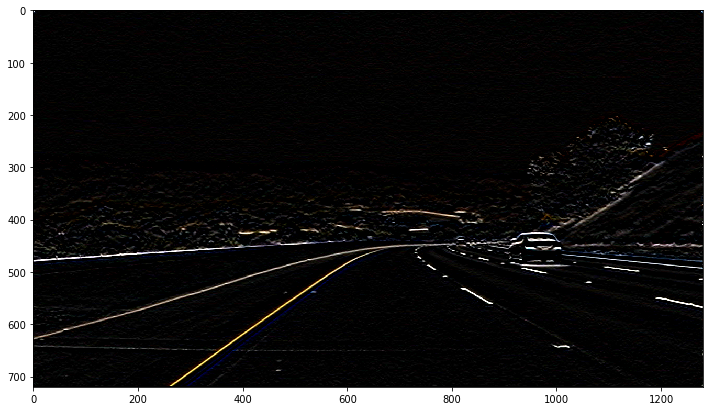

In [25]:
color_channels = cv.split(img_rgb)
[r, g, b] = color_channels

filtered_channels = [cv.filter2D(c, ddepth=-1, kernel=sobel_y) for c in color_channels]

rgb_filtered = cv.merge(filtered_channels)
print(rgb_filtered.shape)

plt.figure(figsize=(12, 7))
plt.imshow(rgb_filtered)
plt.show()

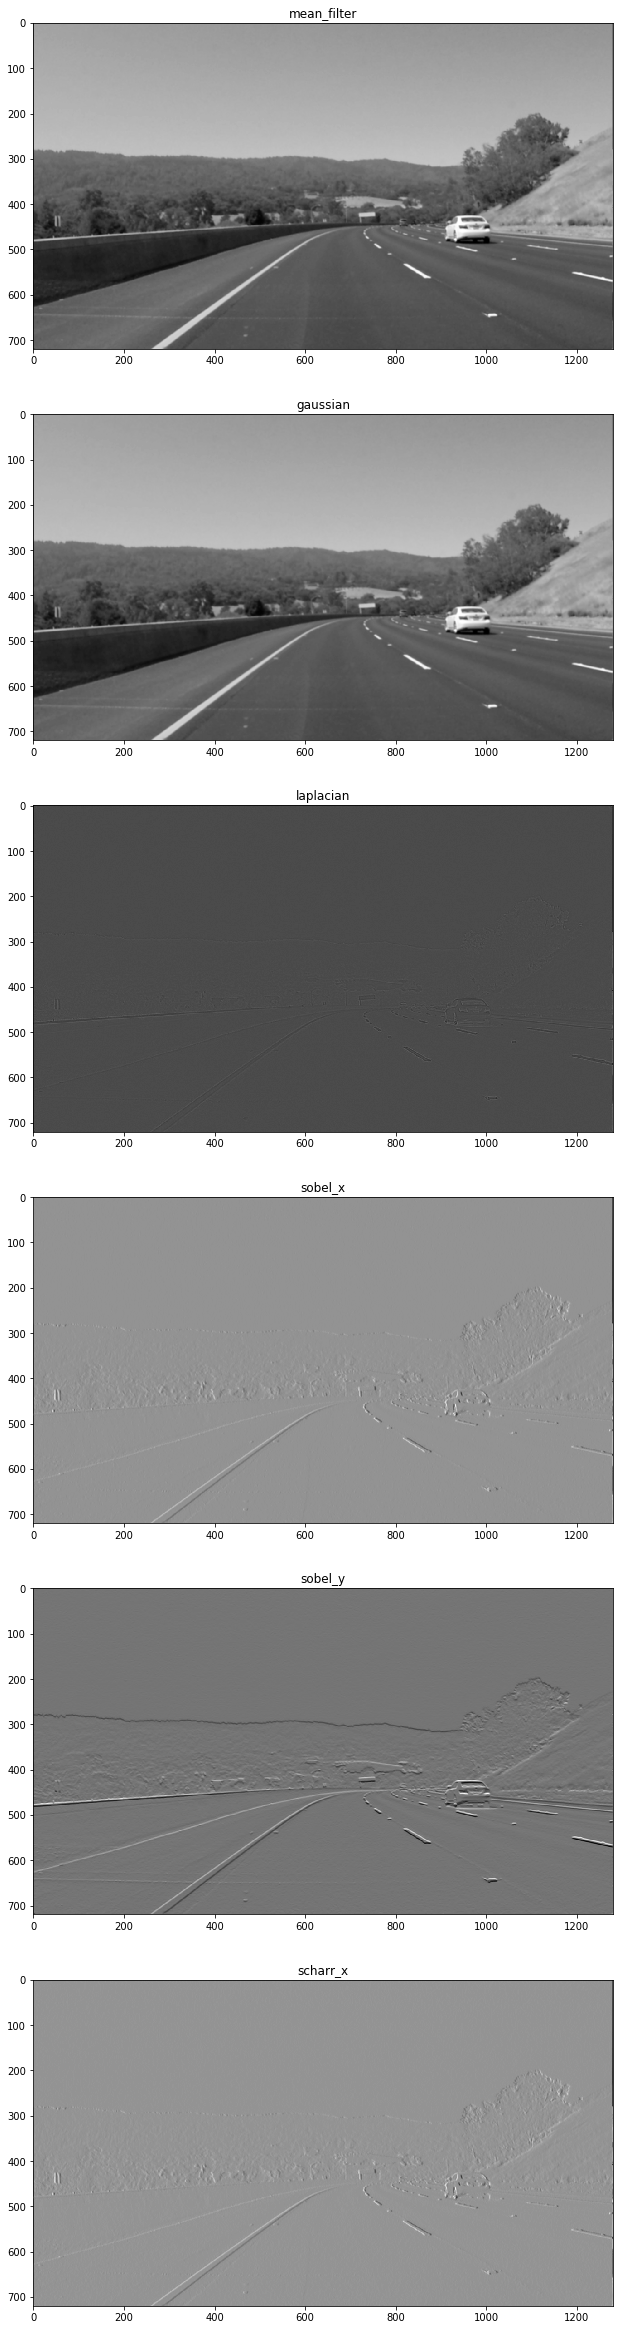

In [76]:
img_norm = np.float32(img_gray) # / 255.

# simple averaging filter without scaling parameter
mean_filter = np.ones((3, 3)) / 9.

# creating a guassian filter
x = cv.getGaussianKernel(5, 0)
gaussian = x * x.transpose()

# different edge detecting filters
# scharr in x-direction
scharr = np.array([
    [ -3, 0,  3],
    [-10, 0, 10],
    [ -3, 0,  3],
])
# sobel in x direction
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])
# sobel in y direction
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1],
])
# laplacian
laplacian = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0],
])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', 'sobel_y', 'scharr_x']

filters_applied = [cv.filter2D(img_norm, ddepth=-1, kernel=k) for k in filters]

_, axi = plt.subplots(6, 1, figsize=(12, 42))

for i, ax in enumerate(axi.flat):
    ax.set_title(filter_name[i])
    ax.imshow(filters_applied[i], cmap='gray')
    
plt.show()

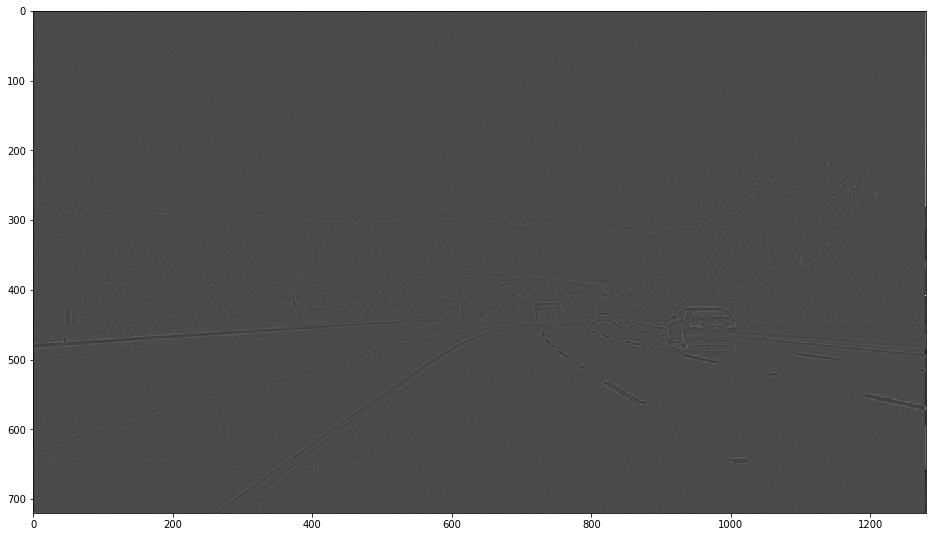

In [77]:
plt.figure(figsize=(16, 10))
plt.imshow(filters_applied[2], cmap='gray')

plt.show()

## Prewitt operator

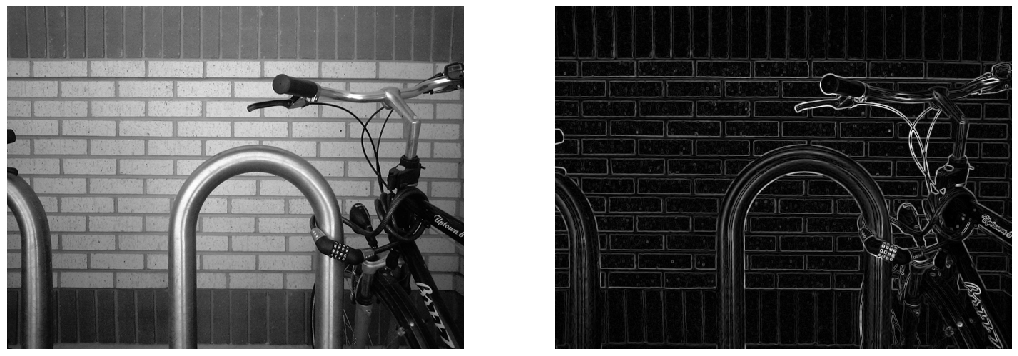

In [62]:
img_bike = cv.imread('images/bikesgray.jpg', cv.IMREAD_GRAYSCALE)
img_bike = np.float32(img_bike)

prewitt_x = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
])

prewitt_y = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1],
])

px = cv.filter2D(img_bike, ddepth=-1, kernel=prewitt_x)
py = cv.filter2D(img_bike, ddepth=-1, kernel=prewitt_y)
prewitt = np.sqrt(px * px + py * py)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.axis('off')
ax1.imshow(img_bike, cmap='gray')
ax2.axis('off')
ax2.imshow(prewitt, cmap='gray')

plt.show()

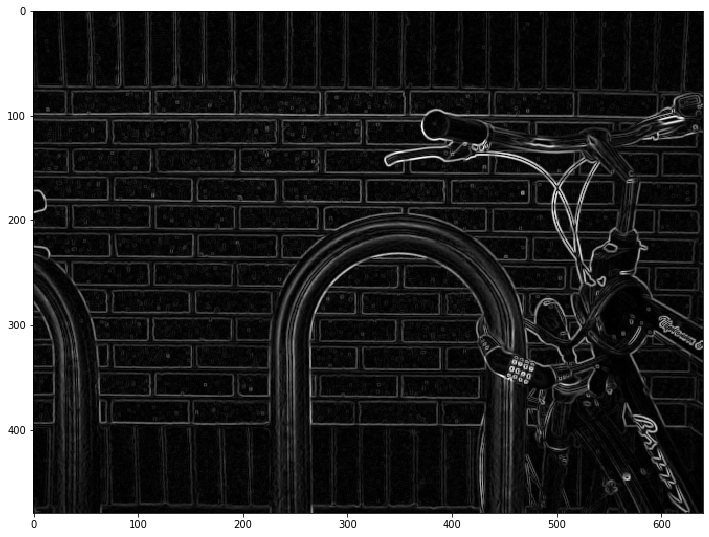

In [65]:
plt.figure(figsize=(12, 11))
plt.imshow(prewitt, cmap='gray')

plt.show()

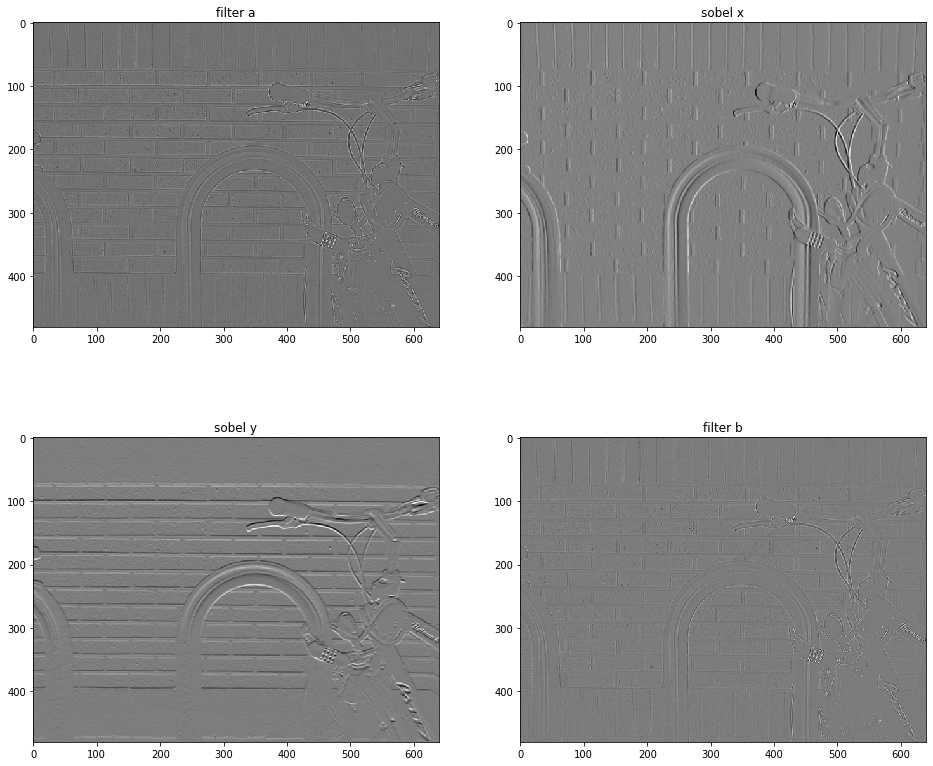

In [79]:
filter_a = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])
# sobel in y direction
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1],
])
# laplacian
filter_b = np.array([
    [ 0, -1,  0],
    [-2,  6, -2],
    [ 0, -1,  0],
])

filters = [filter_a, sobel_x, sobel_y, filter_b]
filter_name = ['filter a', 'sobel x', 'sobel y', 'filter b']

filters_applied = [cv.filter2D(img_bike, ddepth=-1, kernel=k) for k in filters]

_, axi = plt.subplots(2, 2, figsize=(16, 14))

for i, ax in enumerate(axi.flat):
    ax.set_title(filter_name[i])
    ax.imshow(filters_applied[i], cmap='gray')
    
plt.show()

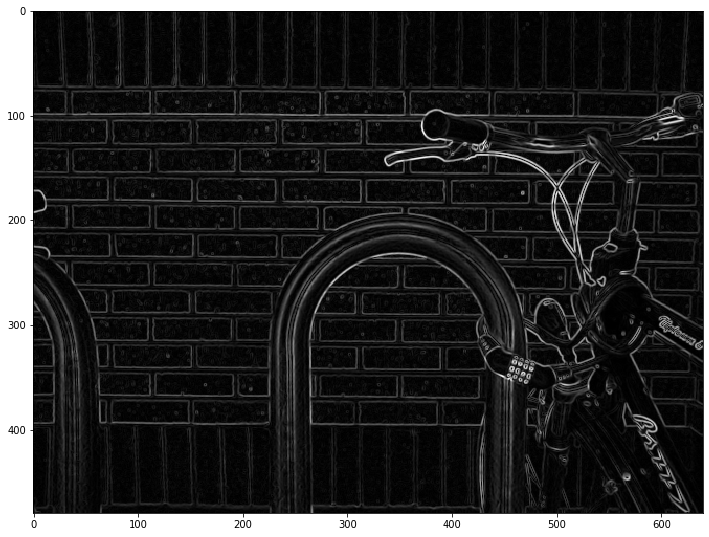

In [81]:
sobel_x, sobel_y = filters_applied[1:3]
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(12, 11))
plt.imshow(sobel, cmap='gray')

plt.show()